GROUP No: 3

Members: 
- Brianna Balam Velasco
- Goutham Menon 



# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Control Chart Class  (10 points implementation and 10 points documentation)

In [2]:
# Import your python class for control charts

from nuevoControlchart import Control_chart

The `Control_chart` class provides functionalities to generate different types of control charts for analyzing process stability based on the statistical quality control framework, this class supports the calculation of control limits, identification of outliers, and detection of violations of key control chart rules. 

Among the functionalities of this class there are:

- **Initialization and label extraction**: `_get_labels_and_sample_size` method extracts observation labels and determines the sample size, which are necessary for further calculations.

- **Mean and range calculation**: `_calculate_mean` method computes the average value (`x_mean`) and range (`R`) for each sample, which are used to establish central tendency and spread measures.

- **Central line and control limits calculation**: `_calculate_centre_line` and `_calculate_control_limits` methods compute the center line and control limits (UCL and LCL) for the control chart. Factors such as `A2`, `D3`, and `D4` are used, which are obtained from the `factors.csv`.

- **Rule violation validators**:
  - **Rule 1 validator** (`_rule1_validator`): identifies samples that fall outside the control limits.
  - **Rule 2, Rule 3, Rule 4 validators**: `_rule2_validator`, `_rule3_validator`, and `_rule4_validator` are used to detect different patterns that indicate potential shifts or trends in the process; Rule 2 checks for consecutive points beyond the warning limits, while Rules 3 and 4 look for other specific patterns.
  - **Rule 5 validator** (`_rule5_validator`): detects additional violations as part of ensuring process control.

- **Control chart plotting** (`plot_control_char`): this method of the class generates control charts for `x_mean` or `R`, with options to apply multiple rules for detecting process violations, the charts are created using Seaborn's FacetGrid, and violations are highlighted in different colors to make analysis straightforward.

The class provides visual representations for analyzing central tendency (`X̄ Chart`) and variability (`R Chart`) while identifying any unusual trends or systematic shifts in the process, this class helps us to monitor the process and maintain statistical control by observing key rules and adjusting based on violations.

# Dataset import
Read your dataset and factors files 

In [3]:
# Include your code here (you can add as many cells as you need)

# Load the dataset (both sheets)
excel_file_path = 'group_03.xlsx'
data_sheet1 = pd.read_excel(excel_file_path, sheet_name=0)
data_sheet2 = pd.read_excel(excel_file_path, sheet_name=1)

# Rule 2 (30 points in total)

### Data exploration (7 points)

In [4]:
# Include your code here (you can add as many cells as you need)

In [5]:
# Display the first few rows of each sheet to inspect
data_sheet1.head()

,Unnamed: 0,No,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,1,111.811277,112.635595,100.376053,115.746704,74.223081,88.741032,93.507070,96.355126,81.651603
1,1,2,88.747107,76.776407,92.630634,108.325363,105.671833,98.276934,106.396389,112.353028,90.639816
2,2,3,77.379915,101.834743,90.736261,97.640699,79.031733,106.273771,96.350944,95.006398,104.138476
3,3,4,108.518692,97.742984,121.980651,69.767615,101.156862,115.405169,80.682904,91.666701,92.979131
4,4,5,81.858036,99.952546,99.649520,95.323991,103.058599,88.097556,99.543122,92.236656,110.444197


In [6]:
# Remove unnecessary column 'Unnamed: 0' for better analysis
data_sheet1.drop(columns=['Unnamed: 0'])

,No,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1,111.811277,112.635595,100.376053,115.746704,74.223081,88.741032,93.507070,96.355126,81.651603
1,2,88.747107,76.776407,92.630634,108.325363,105.671833,98.276934,106.396389,112.353028,90.639816
2,3,77.379915,101.834743,90.736261,97.640699,79.031733,106.273771,96.350944,95.006398,104.138476
3,4,108.518692,97.742984,121.980651,69.767615,101.156862,115.405169,80.682904,91.666701,92.979131
4,5,81.858036,99.952546,99.649520,95.323991,103.058599,88.097556,99.543122,92.236656,110.444197
5,6,124.206647,108.342038,85.068029,105.597225,98.861648,101.379461,95.019810,92.652795,126.089876
6,7,98.769734,94.051057,73.059455,99.746511,117.798084,110.729078,90.348994,103.617086,117.409584
7,8,119.544853,107.006537,113.043064,101.955442,124.049266,110.577677,100.264000,103.336065,124.181241
8,9,110.612230,99.759662,110.834300,105.822209,108.479749,131.642889,117.687684,95.490272,108.832192
9,10,103.954668,91.934439,82.042220,99.303083,96.150352,114.411472,98.935573,106.225488,91.900015


In [7]:

# transpose the data to have the samples as rows and the variables as columns
trans_df1=data_sheet1.T
trans_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000
No,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000
x1,111.811277,88.747107,77.379915,108.518692,81.858036,124.206647,98.769734,119.544853,110.612230,103.954668,98.255942,100.981209,106.625557,132.200557,100.070367
x2,112.635595,76.776407,101.834743,97.742984,99.952546,108.342038,94.051057,107.006537,99.759662,91.934439,96.271814,98.133308,121.285894,102.731563,85.202291
x3,100.376053,92.630634,90.736261,121.980651,99.649520,85.068029,73.059455,113.043064,110.834300,82.042220,89.573463,97.111931,81.193634,108.979700,108.621820


In [8]:
trans_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Unnamed: 0 to x9
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11 non-null     float64
 1   1       11 non-null     float64
 2   2       11 non-null     float64
 3   3       11 non-null     float64
 4   4       11 non-null     float64
 5   5       11 non-null     float64
 6   6       11 non-null     float64
 7   7       11 non-null     float64
 8   8       11 non-null     float64
 9   9       11 non-null     float64
 10  10      11 non-null     float64
 11  11      11 non-null     float64
 12  12      11 non-null     float64
 13  13      11 non-null     float64
 14  14      11 non-null     float64
dtypes: float64(15)
memory usage: 1.7+ KB


In [9]:
# Check for missing values
trans_df1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

### EDA  (7 points)

In [10]:
# statistical summary of the data
trans_df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,79.640686,80.256137,77.581176,80.627337,79.924020,86.201593,83.502689,92.632559,91.469199,82.168846,83.101852,84.056160,84.798410,90.622020,81.357185
std,41.197169,40.277567,38.242888,40.868144,38.051556,41.760211,40.118812,42.903558,42.062828,36.898807,36.692391,36.462416,37.438946,39.661602,33.980527
min,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000
25%,77.937342,82.761757,78.205824,75.225260,84.977796,88.860412,81.704224,101.109721,97.624967,86.971118,89.444648,90.757249,85.261824,94.489496,83.686400
50%,93.507070,92.630634,95.006398,92.979131,95.323991,98.861648,98.769734,107.006537,108.479749,96.150352,96.271814,98.133308,97.554371,102.731563,95.645431
75%,106.093665,106.034111,99.737721,104.837777,99.801033,106.969632,107.173082,116.293958,110.723265,101.628875,101.926333,102.447860,108.008297,111.087732,98.601165
max,115.746704,112.353028,106.273771,121.980651,110.444197,126.089876,117.798084,124.181241,131.642889,114.411472,114.714105,113.233380,121.285894,132.200557,108.621820


#### descriptive statistics key insights


Mean values of the samples range between approximately 77.581176 and 92.632559, suggesting a relatively high central tendency across the dataset, ssample 3 and sample 8, for example, have mean values of 80.627337 and 91.469199, respectively, indicating some variation in central values, but with a general trend towards higher values.

Standard deviations across the samples vary from 33.980527 (sample 14) to 42.903558 (sample 7), showing that some samples have more dispersed values while others are more consistent, for instance, sample 7 displays higher variability, suggesting a wider spread, while sample 14 has less variability, indicating greater consistency in values.

Minimum and maximum values give us a clearer picture of the spread, sample 3 has values ranging from 3.000000 to 121.980651, highlighting a relatively wide range (possible outliers or unusual measurements), sample 14 has a range from 14.000000 to 108.621820, showing a narrower variation compared to Sample 3, also the ranges indicate that some samples contain low minimum values (sample 1, Sample 9), which could signify metrics needing careful review or potential anomalies.

The interquartile range (IQR) values reveal significant differences between samples, for example, sample 5 has an IQR ranging from approximately 88.860412 to 106.969632, implying substantial variability within its middle 50% of data values, in contrast, sample 14 has a more compact IQR, indicating that most of its values are relatively close together, which is consistent with its lower standard deviation.


Comparing the mean and median values, we can infer skewness in some of the samples, for example, sample 9 has a mean (82.168846) higher than the median (96.150352), suggesting a right-skewed distribution, where outliers or extreme values may be pulling the mean upward.

<Figure size 1200x800 with 0 Axes>

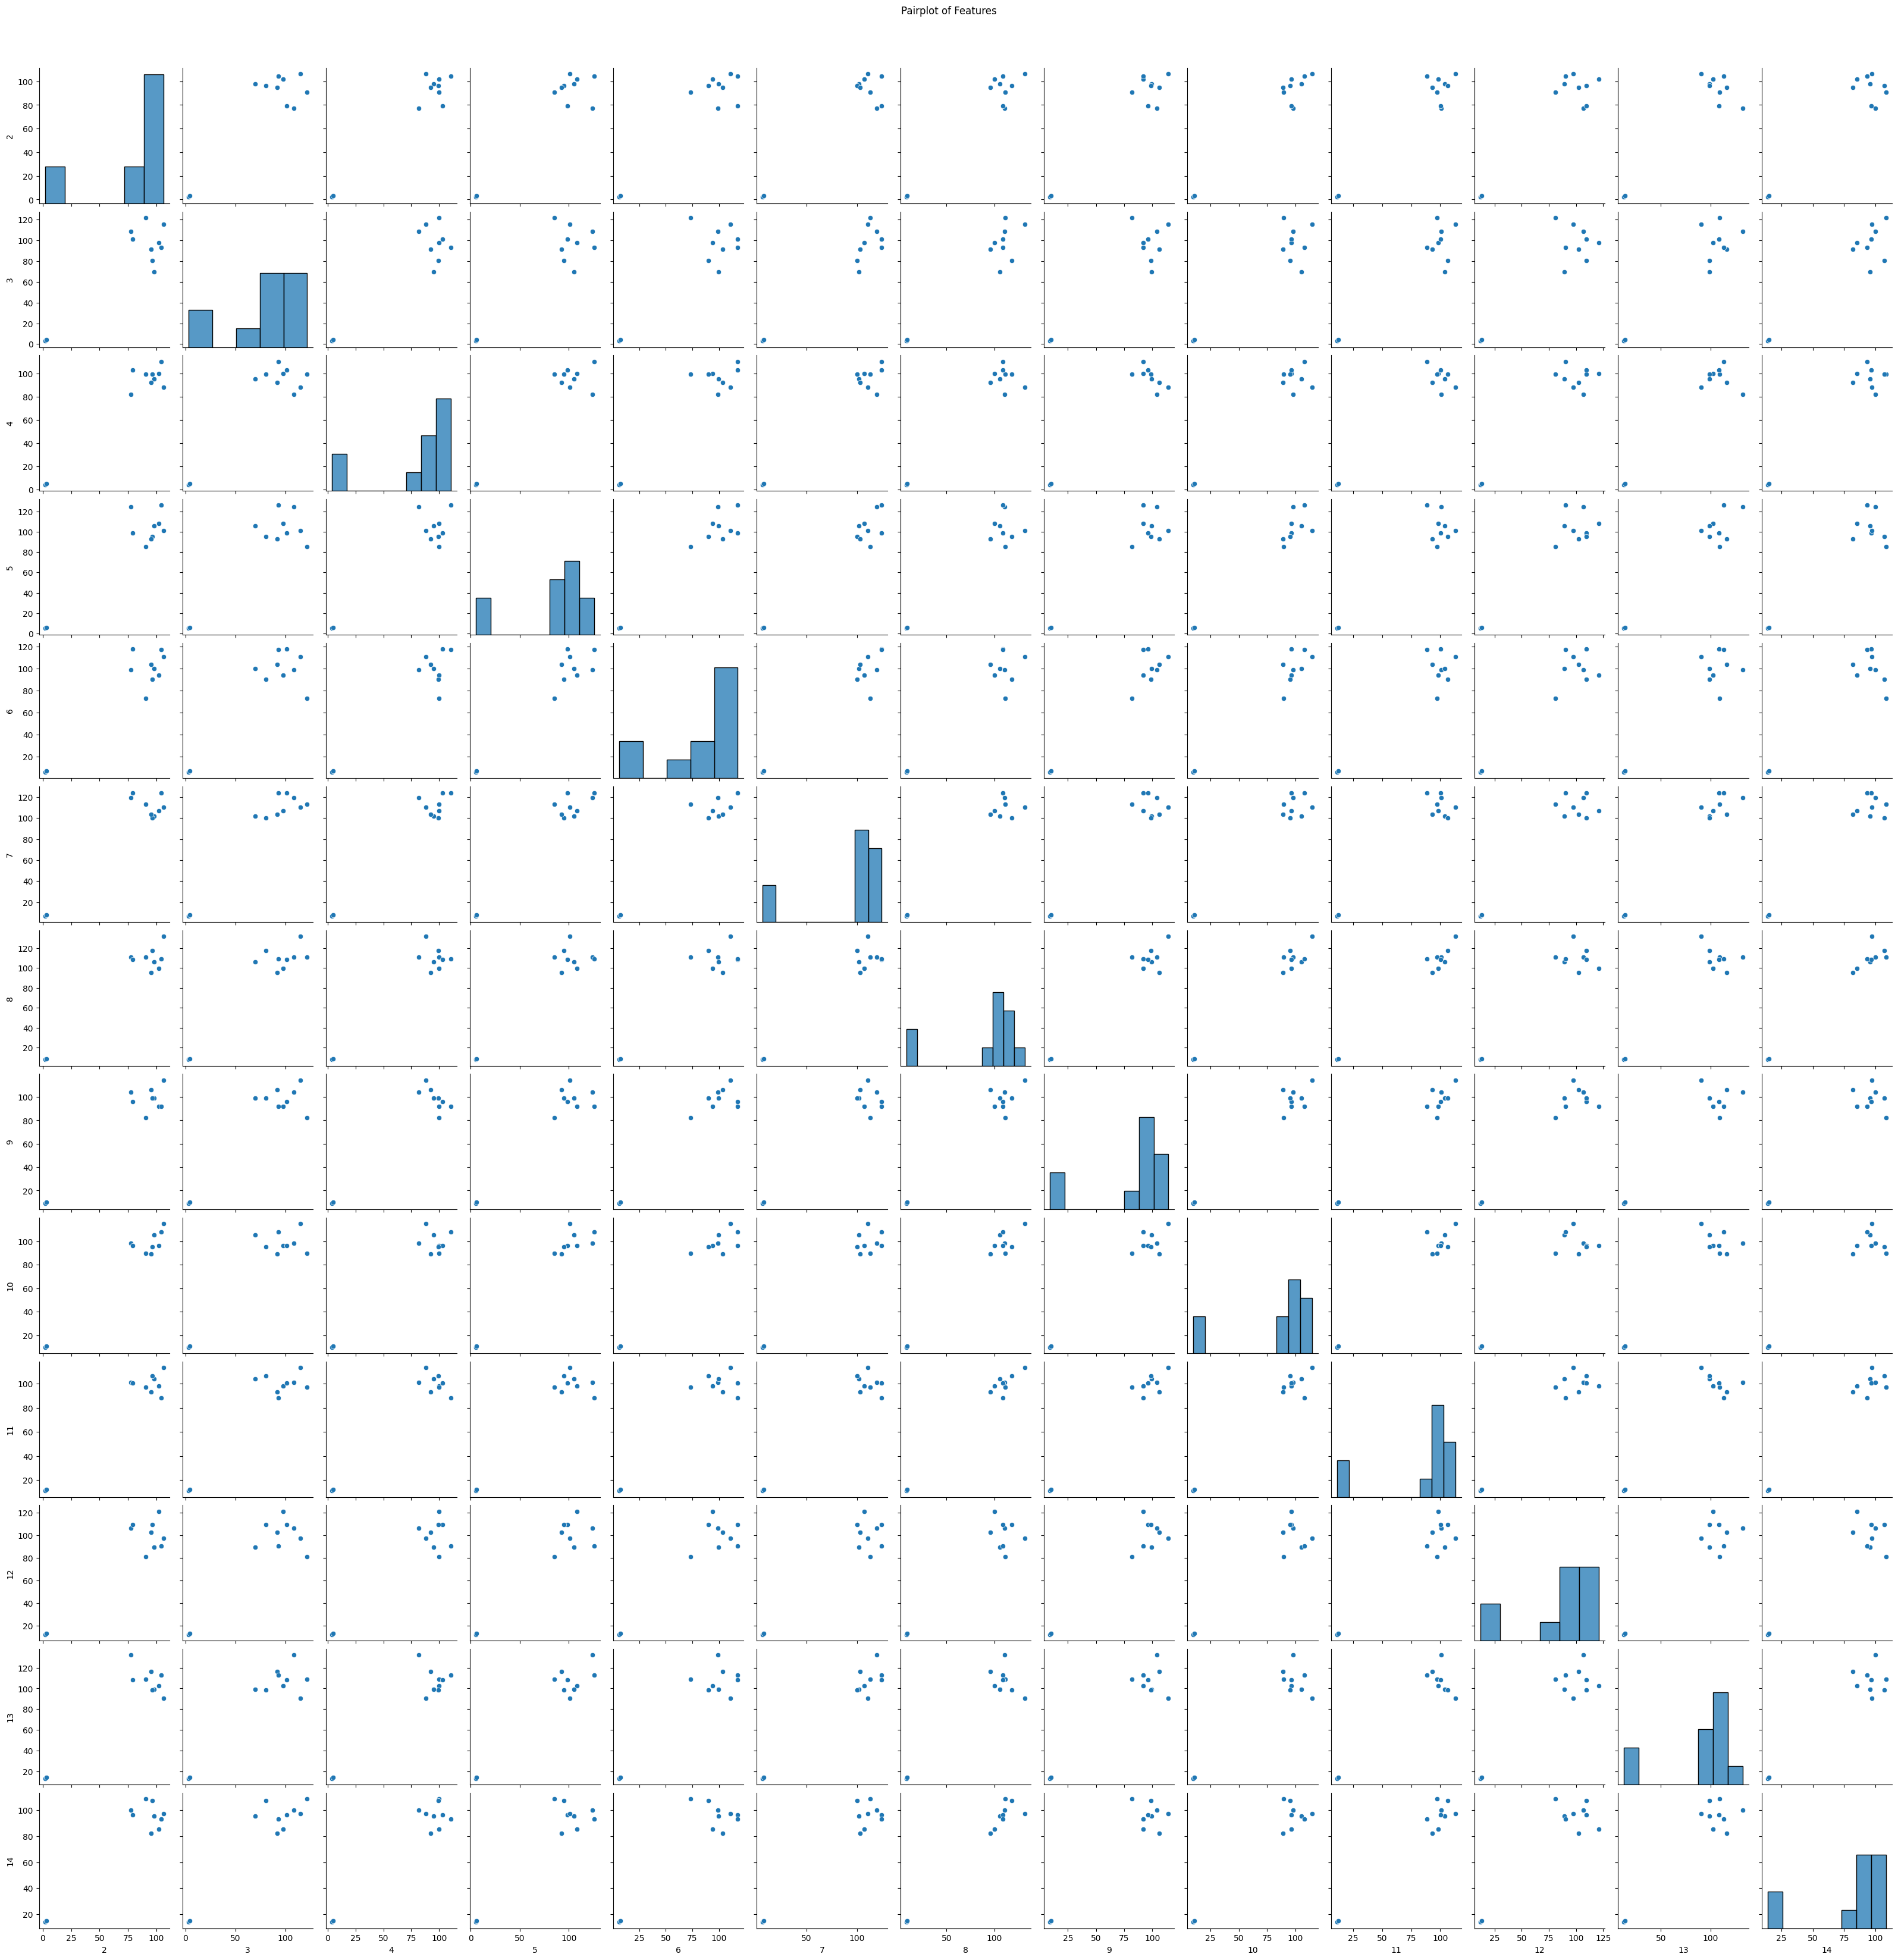

In [11]:
# Pairplot to understand relationships between variables
plt.figure(figsize=(12, 8))
sns.pairplot(trans_df1.iloc[:, 2:])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

The scatter plots of transposed features show us a scattered distribution, with no noticeable linear trends or relationships, and this suggests us that the transposed features do not exhibit any strong interdependencies, indicating that each feature provides unique information; the lack of clear linear or non-linear patterns between the features implies that there is no inherent dependence among them, as a result, the features could potentially be treated as independent variables.

They also reveal isolated points that are positioned far from the main cluster of points, these outliers are notable as they might skew statistical measures or adversely impact model performance if not properly handled. These outliers may require further examination to determine whether they are legitimate variations or errors, the histograms along the diagonal represent the distribution of each transposed feature individually, also some histograms indicate potential skewness, with an asymmetric spread of data.

They are not display any obvious clusters of data points, which suggests that there are no natural groupings within the dataset, this is consistent across all feature comparisonsand the absence of clustering implies that the dataset does not inherently separate into distinct categories, which might limit the effectiveness of clustering algorithms without further feature engineering.

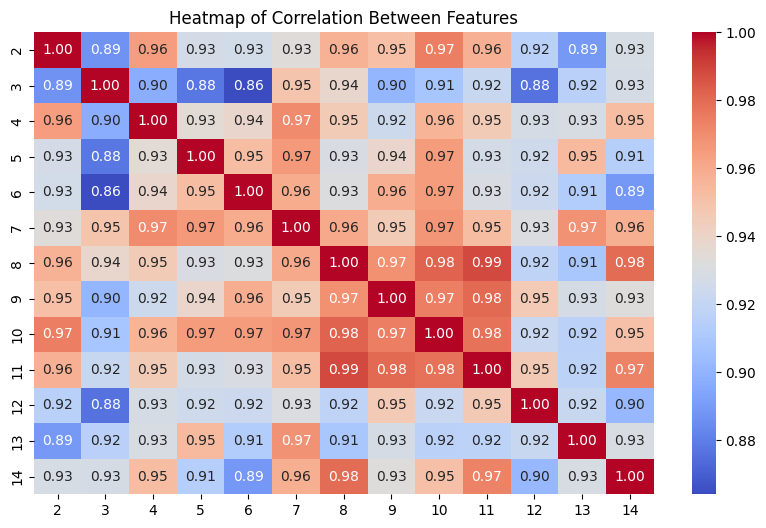

In [12]:
# Heatmap for correlations between variables
plt.figure(figsize=(10, 6))
sns.heatmap(trans_df1.iloc[:, 2:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Between Features')
plt.show()

This heatmap show us high correlations between multiple features, with correlation values frequently exceeding 0.9, suggesting that many features share similar characteristics or patterns, indicating that there might be considerable redundancy among them, also the presence of high correlations across features implies that different samples exhibit similar behavior and this could point to systematic similarities in how these features are distributed, which might be due to inherent similarities in the data collection process or shared influences among samples.

It also show us that correlations between features are positive and relatively high, suggesting that many samples have similar distributions and trends and this shared behavior might provide opportunities to derive new features that encapsulate these common patterns, potentially reducing the feature space and simplifying the modeling process. High positive correlations indicate that when one feature increases, other correlated features tend to increase as well, this can provide insights into potential groupings of features that share similar characteristics, which could be useful for designing interaction terms or aggregated features.

### Control Charts (6 points)

In [13]:
# Initialize the Control_chart class
control_chart = Control_chart()

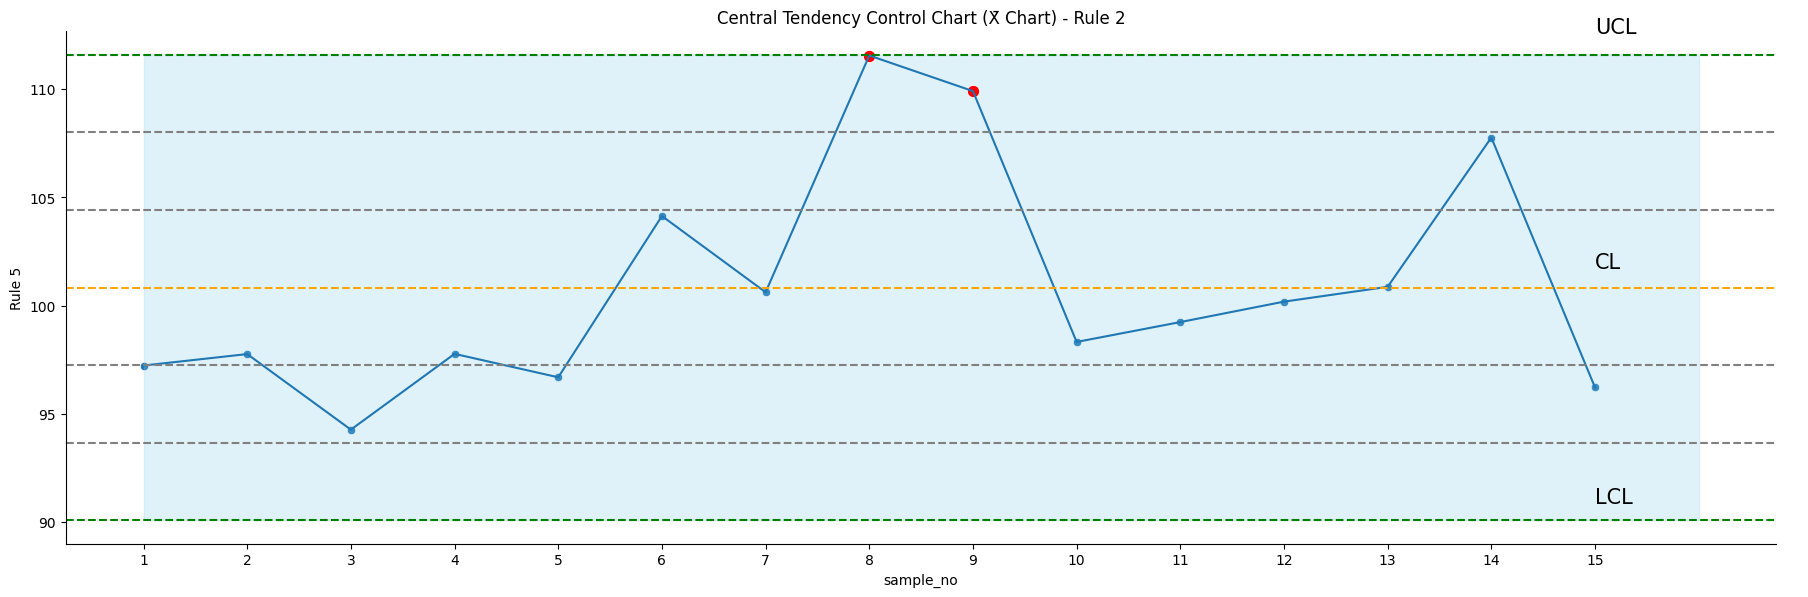

In [14]:
# Calculate x_mean (average of the observation columns) for Rule 2 control chart
observation_columns = [col for col in data_sheet1.columns if col.startswith('x')]
data_sheet1['x_mean'] = data_sheet1[observation_columns].mean(axis=1)

data_sheet1['sample_no'] = data_sheet1.index + 1

# Generate the Rule 2 control chart for x_mean (central tendency control chart)
control_chart.plot_control_char(data_sheet1, kind='x_mean', rules=['Rule 1', 'Rule 2', 'Rule 3','Rule 4', 'Rule 5'])

plt.title(f'Central Tendency Control Chart (X̄ Chart) - Rule 2')
plt.show()

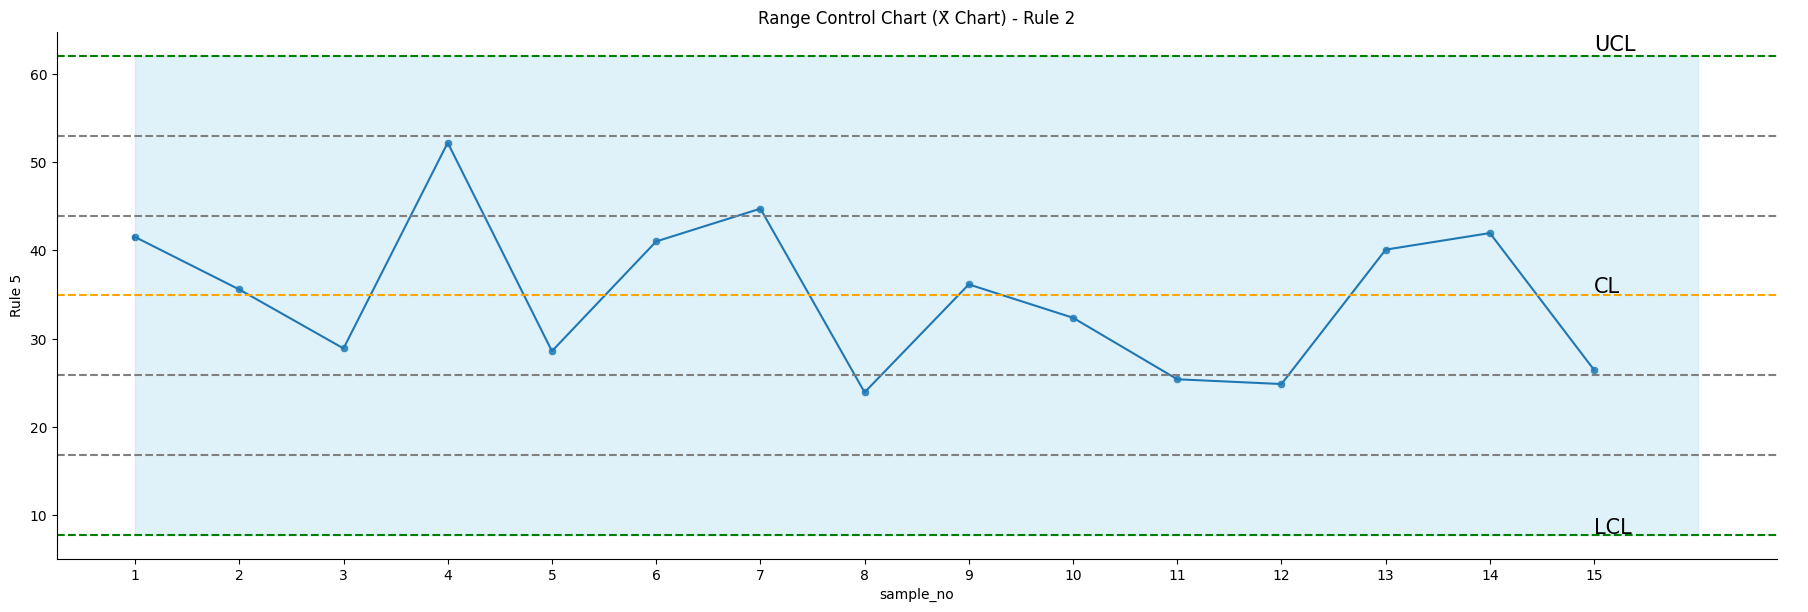

In [15]:
# Generate the Rule 2 control chart for R (range control chart)
control_chart.plot_control_char(data_sheet1, kind='R', rules=['Rule 1', 'Rule 2', 'Rule 3','Rule 4', 'Rule 5'])
plt.title(f'Range Control Chart (X̄ Chart) - Rule 2')
plt.show()

### Results Rule 2 (10 points)

Include your insights here (you can add as many cells as you need)

#### Central Tendency Control Chart (X̄ Chart)

The Central Tendency Control Chart provides insight into the process mean (x_mean) over time, with control limits established to indicate the expected range of variation if the process is in control. In the X̄ Chart for Sheet 1, there are two points highlighted in red, which indicates that these data points have violated **Rule 2**, which states that **two out of three consecutive points** must fall beyond the warning limits, which are typically set at two standard deviations from the centerline, but still within the control limits and this indicates an unusual shift in the central tendency of the process, suggesting that the process may be approaching instability or is influenced by emerging issues.

The violation of Rule 2 suggests that the process is experiencing a deviation that requires investigation, also this could indicate systematic factors influencing the process, such as changes in raw material quality, calibration issues, or shifts in environmental conditions, and addressing these issues early can prevent the process from going out of control, ensuring stability and quality in the production.

#### Range Control Chart (R Chart)

The Range Control Chart (R Chart) is used to monitor the dispersion or variability of the observed values over time, in the R Chart for Sheet 1, there are no significant outliers that fall outside of the control limits, indicating that the variability of the process is generally stable; however, there are still visible fluctuations in the range values across different samples, suggesting that some variability is present, which may require monitoring.

The consistency in the range values implies that the overall process variability is within acceptable limits, but the visible fluctuations suggest potential minor issues such as gradual equipment wear, minor inconsistencies in material properties, or manual operation variations, and addressing these sources of variation may help to reduce process variability and maintain consistent quality.

#### Potential Issues and Recommendations

##### Central Tendency Issues

The X̄ Chart violations of Rule 2 indicate a shift in the process mean, suggesting that the process may be drifting towards instability, it is super important to identify the root causes of these shifts, which could involve changes in process inputs, material quality, or machine calibration. Our recommendations include increasing monitoring frequency, implementing preventive maintenance, and investigating recent changes in equipment settings or raw material properties.

##### Range Control Chart Observations

The R Chart indicates that process variability is within acceptable limits, but fluctuations suggest potential underlying issues. We recommend to conduct routine equipment maintenance and provide operator training to minimize inconsistencies, additionally, it could be imprtat to re-check the Standard Operating Procedures (SOPs) to ensure uniformity in operations can help maintain stable process variability.

##### General Recommendations for Process Control

1. Identify the underlying causes of shifts in the central tendency by reviewing recent changes in materials, machine settings, and environmental conditions. 
2. Implement more frequent sampling and monitoring to detect deviations earlier, this includes conducting more frequent quality control checks and equipment inspections.
3. Regular calibration and maintenance of equipment can help prevent systematic drift and variability, ensuring consistent process performance.
4. Provide operators with additional training to ensure consistent operation and adherence to procedures, this can help reduce variability caused by human errors.
5. Use warning signals identified by Rule 2 to implement corrective actions before the process goes out of control. 

# Rule 4 (20 points in total)

### Data exploration (7 points)

In [16]:
# Include your code here (you can add as many cells as you need)

In [17]:
# Display the first few rows of each sheet to inspect
data_sheet2.head()

,No,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1,12.483571,9.308678,13.238443,17.615149,8.829233,8.829315,17.896064,13.837174,7.652628,...,7.682912,7.671351,11.209811,0.433599,1.375411,7.188562,4.935844,11.571237,5.459880,2.938481
1,2,17.328244,8.871118,10.337641,2.876259,7.278086,10.554613,4.245032,11.878490,6.996807,...,6.991467,19.261391,9.932514,4.711445,14.112725,3.895782,11.044318,0.201649,3.359070,10.984306
2,3,13.692333,10.856841,9.421759,8.494482,2.607390,6.400779,7.696806,15.285611,11.718091,...,11.620420,8.074589,6.615390,13.058381,15.154998,14.656401,5.803912,8.453938,11.656317,14.877726
3,4,7.604129,9.071705,4.468325,4.018967,14.062629,16.781200,9.639949,15.017664,11.808180,...,11.806978,17.690183,9.820870,17.823218,-3.098726,14.109513,10.435235,8.504963,10.458804,0.062155
4,5,8.901641,11.785563,17.389470,7.408649,5.957532,7.491215,14.577011,11.643756,7.351199,...,10.485388,14.843225,6.489735,8.361689,8.039459,2.682425,11.480601,11.305276,10.025567,8.827064


In [18]:

# transpose the data to have the samples as rows and the variables as columns
trans_df2=data_sheet2.T
trans_df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
No,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000
x1,12.483571,17.328244,13.692333,7.604129,8.901641,2.923146,13.955160,9.522892,1.725169,12.338387,8.135106,20.357586,4.993706,7.058262,7.999268,4.065119,10.233200,5.198948,10.352862,5.071582
x2,9.308678,8.871118,10.856841,9.071705,11.785563,7.896773,5.453063,14.669139,11.266576,4.969794,9.867201,0.828661,8.250189,10.777036,11.773484,4.163891,11.712389,12.097418,14.921011,6.883834
x3,13.238443,10.337641,9.421759,4.468325,17.389470,8.286427,17.013972,1.044997,13.905173,4.946714,12.460731,13.051638,10.855234,-5.140070,16.030478,11.694832,3.867373,10.727671,6.747946,-1.417278
x4,17.615149,2.876259,8.494482,4.018967,7.408649,5.988614,2.990745,9.552407,4.147674,12.583614,12.367241,0.574565,13.736059,6.260304,1.690619,11.131921,19.378160,7.079755,9.535176,6.694029


In [19]:
trans_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, No to x20
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     float64
 1   1       21 non-null     float64
 2   2       21 non-null     float64
 3   3       21 non-null     float64
 4   4       21 non-null     float64
 5   5       21 non-null     float64
 6   6       21 non-null     float64
 7   7       21 non-null     float64
 8   8       21 non-null     float64
 9   9       21 non-null     float64
 10  10      21 non-null     float64
 11  11      21 non-null     float64
 12  12      21 non-null     float64
 13  13      21 non-null     float64
 14  14      21 non-null     float64
 15  15      21 non-null     float64
 16  16      21 non-null     float64
 17  17      21 non-null     float64
 18  18      21 non-null     float64
 19  19      21 non-null     float64
dtypes: float64(20)
memory usage: 4.0+ KB


In [20]:
# Check for missing values
trans_df2.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

### EDA  (7 points)

In [21]:
# Include your code here (you can add as many cells as you need)

In [22]:
# statistical summary of the data
trans_df2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,8.755721,8.352499,9.539570,9.564778,9.648229,10.020087,9.318162,8.801468,9.405734,9.034875,9.175288,9.227868,9.247355,9.489833,9.548456,9.476891,9.275402,9.573371,9.521315,9.729722
std,5.004721,4.937074,4.271738,5.567612,3.531045,5.068317,5.240075,4.419749,4.901310,3.562258,5.265263,5.685296,5.238133,5.612446,4.859000,3.385863,4.740367,3.969882,5.040785,6.165389
min,0.433599,0.201649,1.184799,-3.098726,2.682425,0.406144,2.246683,1.044997,1.725169,2.468324,-0.142214,-0.410926,0.027969,-5.140070,-0.879362,4.065119,2.179184,3.458405,2.162214,-1.417278
25%,5.459880,4.245032,6.615390,6.774401,7.408649,7.896773,5.402879,5.145015,5.791940,6.333353,6.201091,6.085567,4.993706,6.260304,6.019467,7.079561,5.667682,7.071410,6.317594,5.758969
50%,8.829233,8.541531,9.421759,9.820870,8.901641,9.826441,7.482622,10.219402,9.108458,10.334451,9.924730,9.509299,9.914485,9.496607,10.602597,8.599067,9.037316,9.201577,9.535176,9.040534
75%,12.483571,10.984306,13.058381,14.062629,11.643756,11.507737,12.934285,10.881809,11.337665,11.974642,11.000000,12.815819,13.000000,11.811988,12.504319,12.102904,12.240172,12.076220,12.000613,14.766885
max,17.896064,19.261391,15.285611,17.823218,17.389470,22.316211,20.952278,18.057358,21.402055,14.101148,25.603850,20.357586,19.892988,18.955399,19.214609,16.000000,19.378160,18.000000,19.000000,20.000000


#### descriptive statistics key insights

Mean values of the samples range between approximately 8.352499 and 10.020087, suggesting moderate levels across the dataset, sample 3 and sample 5, for example, have mean values of 9.564778 and 9.648229, respectively, indicating no extreme central values but a rather consistent trend across different samples.

Standard deviations across the samples vary from 3.385863 (sample 15) to 5.612446 (sample 13), showing that some samples have more dispersed values while others are more consistent, for instance, sample 13 displays higher variability, suggesting a wider spread, while sample 15 has less variability, indicating greater consistency in values.

Minimum and maximum values give us a clearer picture of the spread, sample 3 has values ranging from -3.098726 to 17.823218, highlighting both a negative minimum (possible outliers or unusual measurements) and a relatively high maximum, also sample 4 has a range from 2.684245 to 17.389470, showing a more moderate variation compared to sample 3; ranges indicate that some samples contain negative values (sample 3, sample 4, sample 11), which could be metrics needing careful review or signify anomalies.

The interquartile range (IQR) values reveal significant differences between samples, for example, sample 14 has an IQR ranging from approximately 6.019467 to 12.504319, implying substantial variability within its middle 50% of data values, in contrast, sample 15 has a more compact IQR, indicating that most of its values are relatively close together, which is consistent with its lower standard deviation.

Comparing the mean and median values, we can infer skewness in some of the samples, for example, sample 3’s median (9.820870) is higher than its mean (9.564778), indicating a left-skewed distribution, which means that more data points are clustered towards higher values; on the other hand, sample 19 has a mean (9.729722) higher than the median (9.040534), suggesting a right-skewed distribution, where outliers or extreme values may be pulling the mean upward.

<Figure size 1200x800 with 0 Axes>

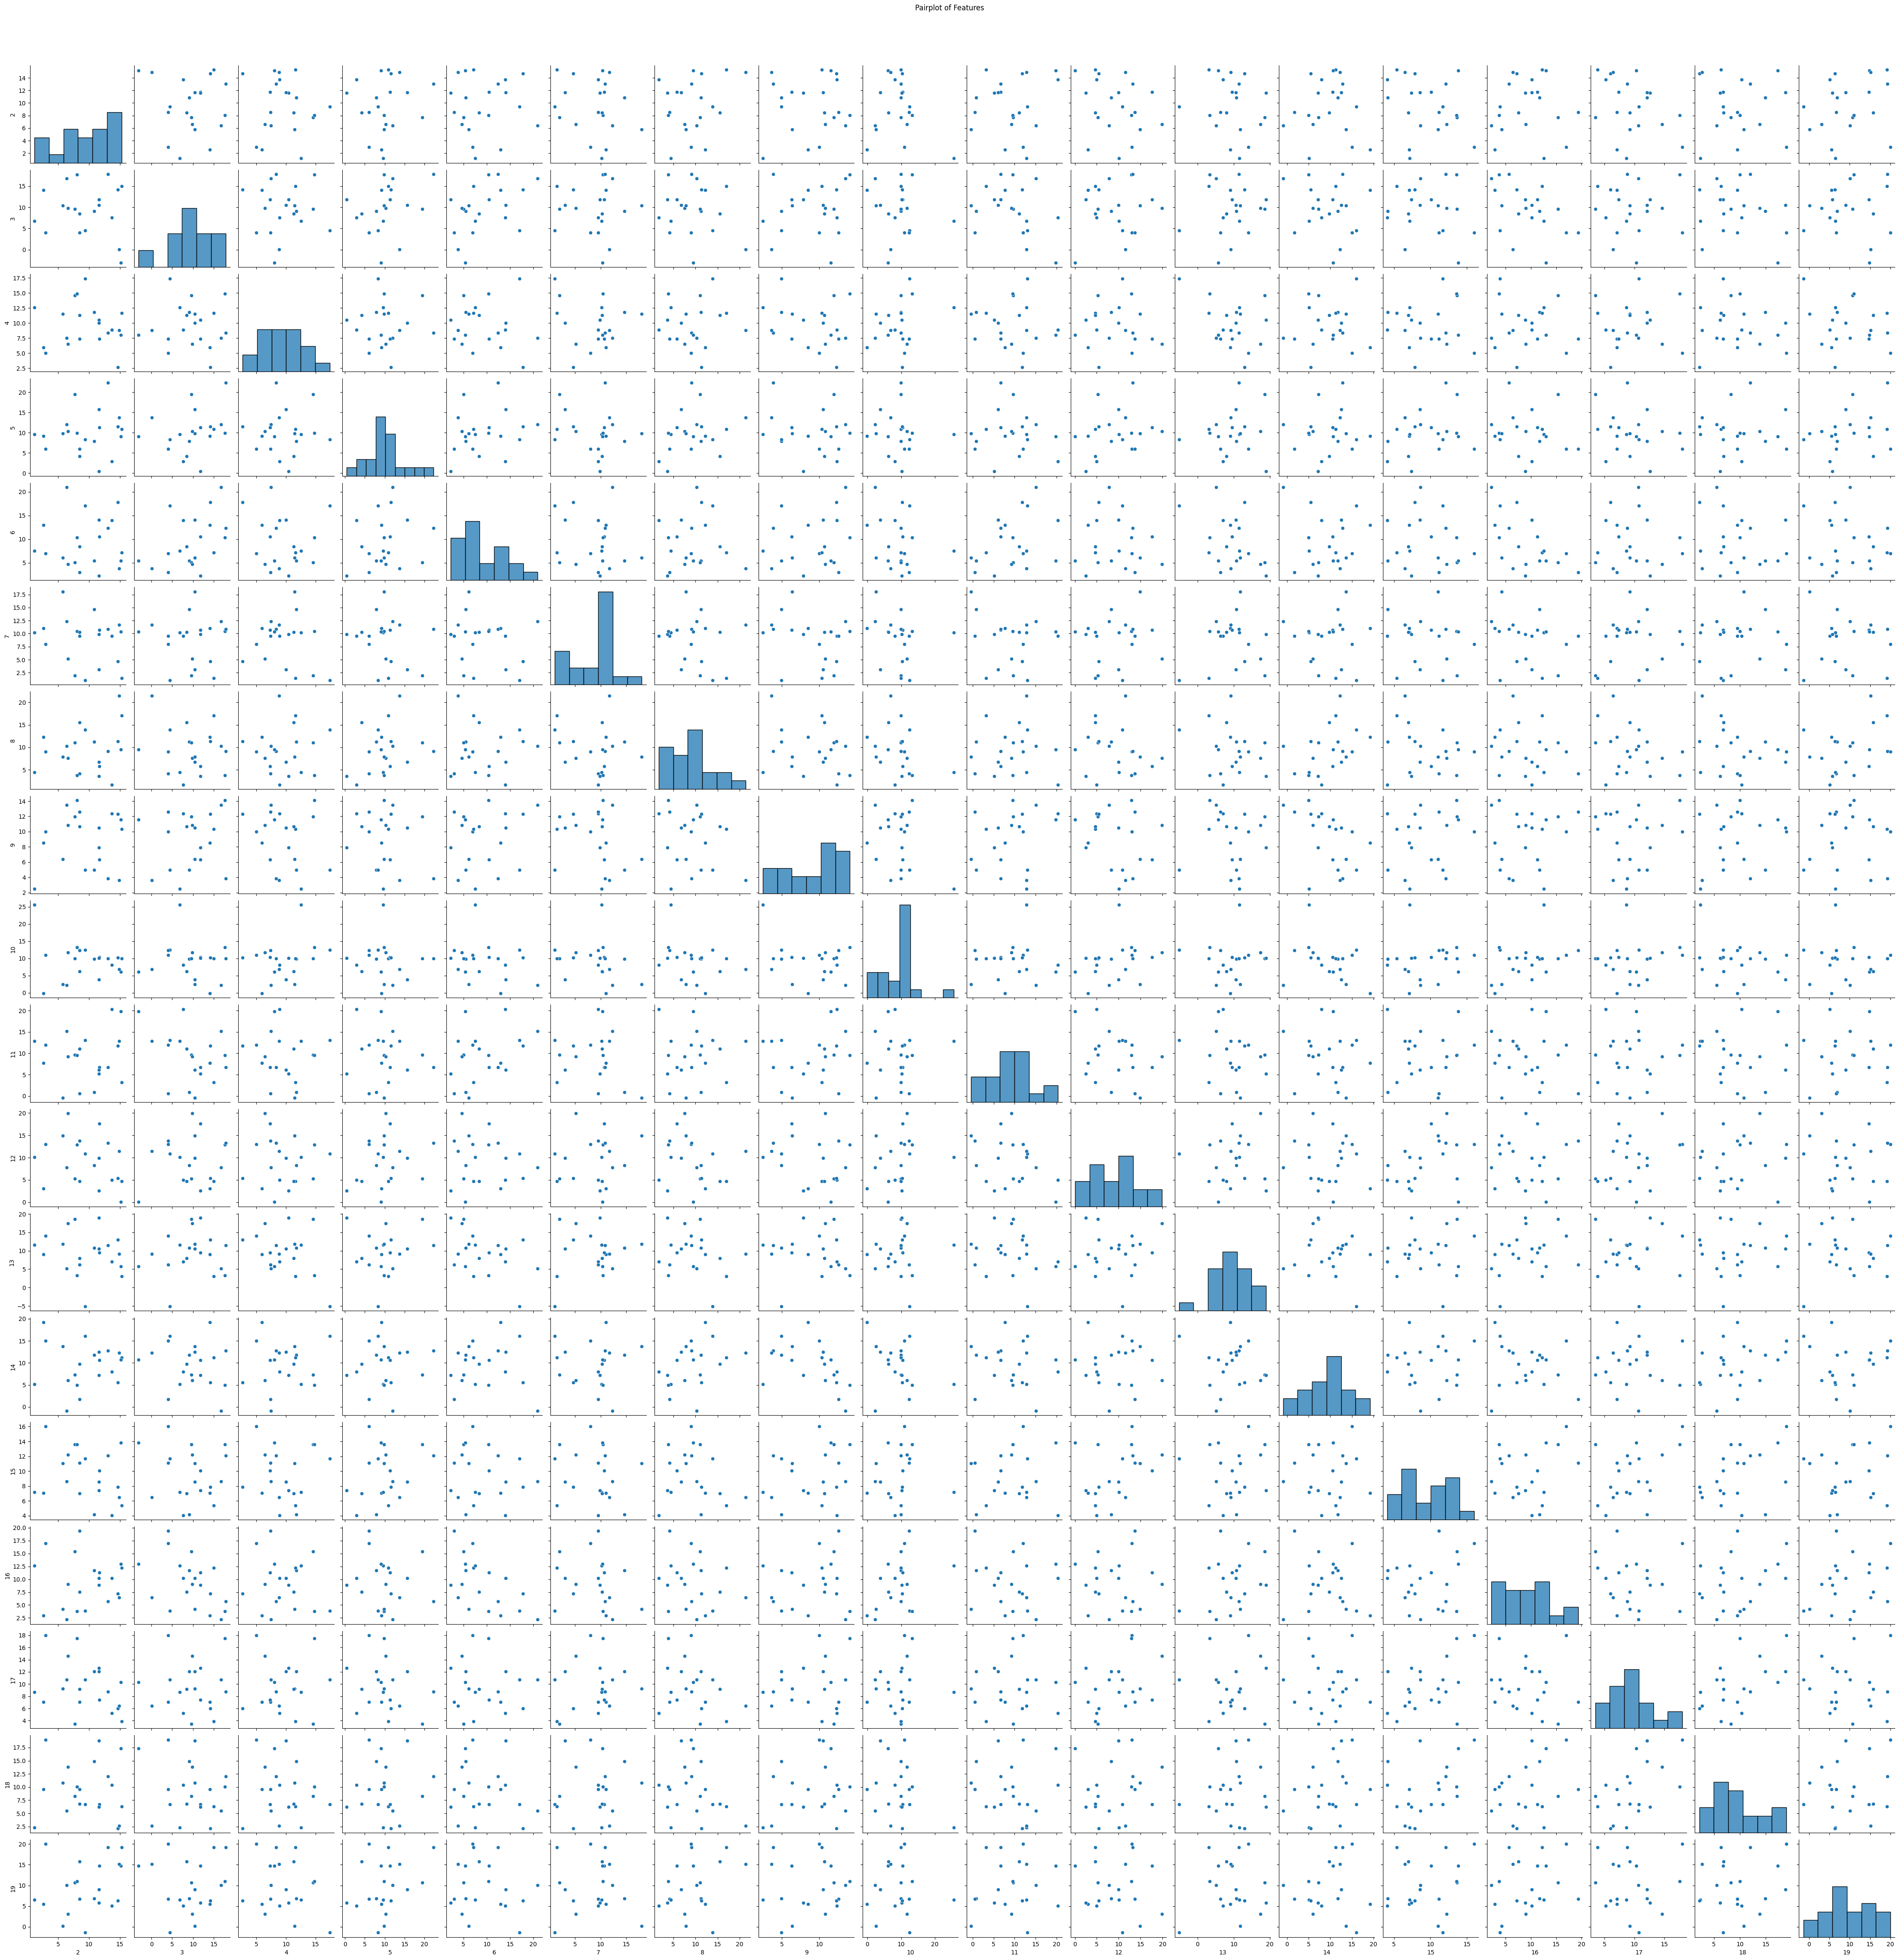

In [23]:
# Pairplot to understand relationships between variables
plt.figure(figsize=(12, 8))
sns.pairplot(trans_df2.iloc[:, 2:])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

 Most of the scatter plots do not show noticeable linear or non-linear relationships, suggesting weak correlations among features, this implies that each feature captures unique information, and there is limited redundancy across the dataset.

The pairplot also reveals some scattered points that are distant from the main cluster, which indicates the presence of **outliers**, these outliers need to be investigated to determine if they are valid observations or potential data errors.Additionally, the histograms along the diagonal indicate that several features are skewed, with either left or right tails, and features like 3 and 19 demonstrate skewness.

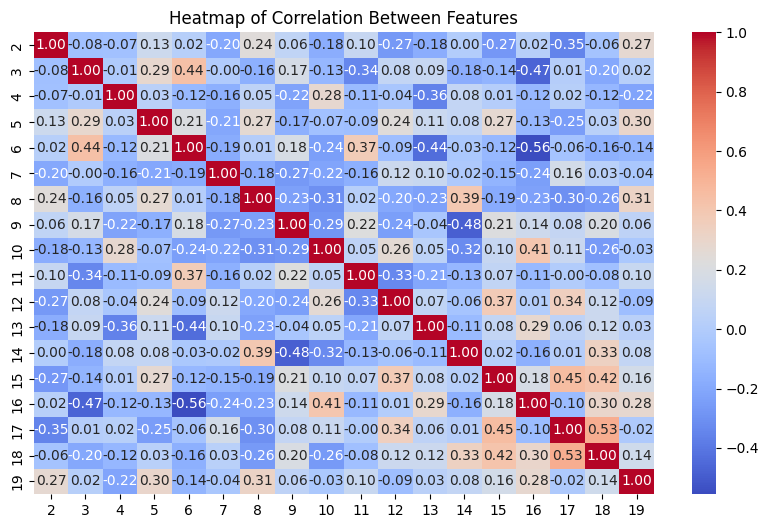

In [24]:
# Heatmap for correlations between variables
plt.figure(figsize=(10, 6))
sns.heatmap(trans_df2.iloc[:, 2:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Between Features')
plt.show()

Correlation matrix highlights the strength and direction of the relationships between features, most correlations are low to moderate, with most correlation coefficients ranging between -0.3 and 0.4, suggesting minimal multicollinearity in the dataset, and since most features are not strongly correlated, they likely contribute independently to the variability in the dataset.

There are a few moderate correlations present, such as between features 5 and 6, and features 13 and 15, with coefficients around 0.45, these correlations may indicate some shared underlying factors, presenting an opportunity for feature engineering to capture these relationships more effectively; negative correlations, such as between features 3 and 19, suggest an inverse relationship, meaning that as one feature increases, the other tends to decrease. 

The overall weak correlations imply that the risk of multicollinearity is low, allowing for greater flexibility in feature selection without needing to remove redundant features, however, features with moderate correlations might still benefit from further investigation to determine whether they could be transformed or combined to enhance predictive performance.

### Control Charts (6 points)

In [25]:
# Include your code here (you can add as many cells as you need)

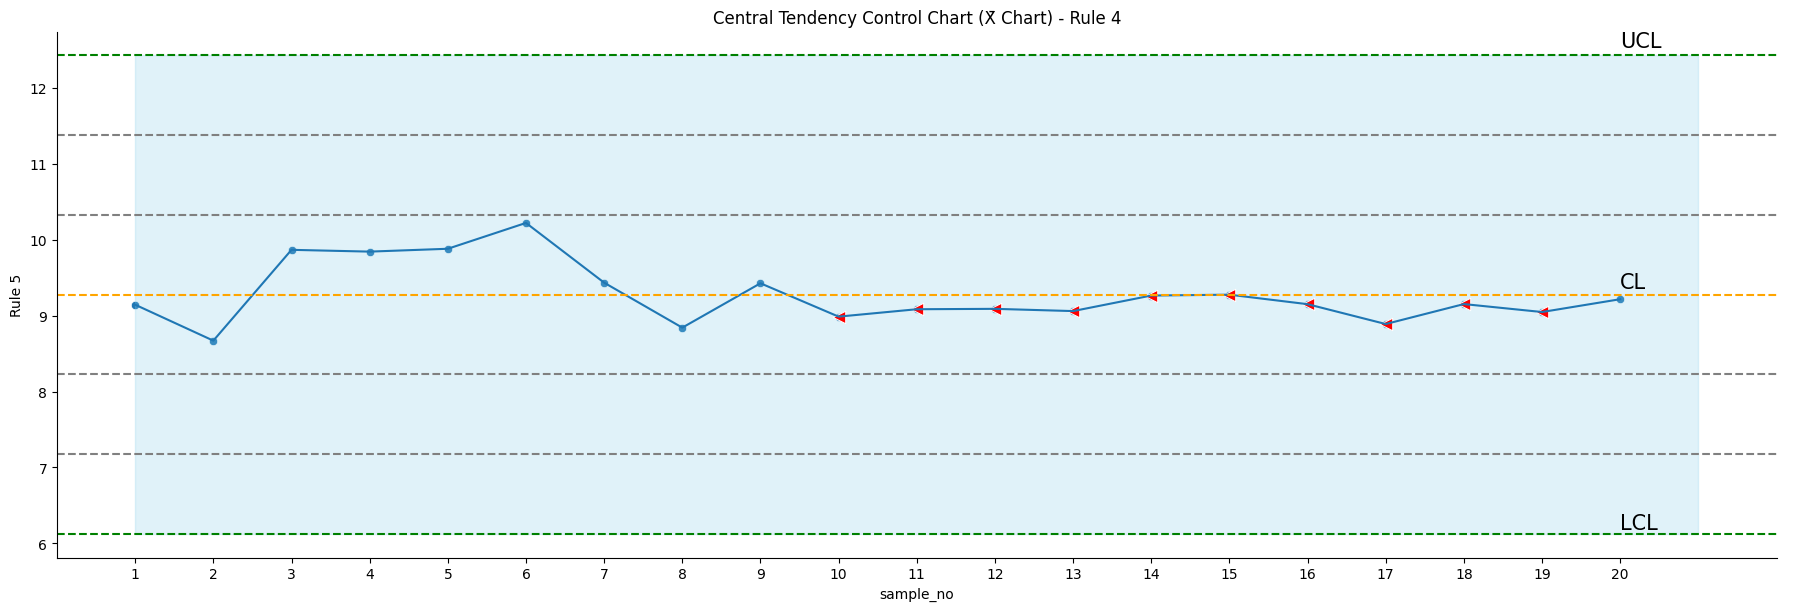

In [26]:
# Calculate x_mean (average of the observation columns) for Rule 4 control chart
observation_columns = [col for col in data_sheet2.columns if col.startswith('x')]
data_sheet2['x_mean'] = data_sheet2[observation_columns].mean(axis=1)

# Add sample number
data_sheet2['sample_no'] = data_sheet2.index + 1

# Generate the Rule 4 control chart for x_mean (central tendency control chart)
control_chart.plot_control_char(data_sheet2, kind='x_mean', rules=['Rule 1', 'Rule 2', 'Rule 3','Rule 4', 'Rule 5'])

plt.title(f'Central Tendency Control Chart (X̄ Chart) - Rule 4')
plt.show()


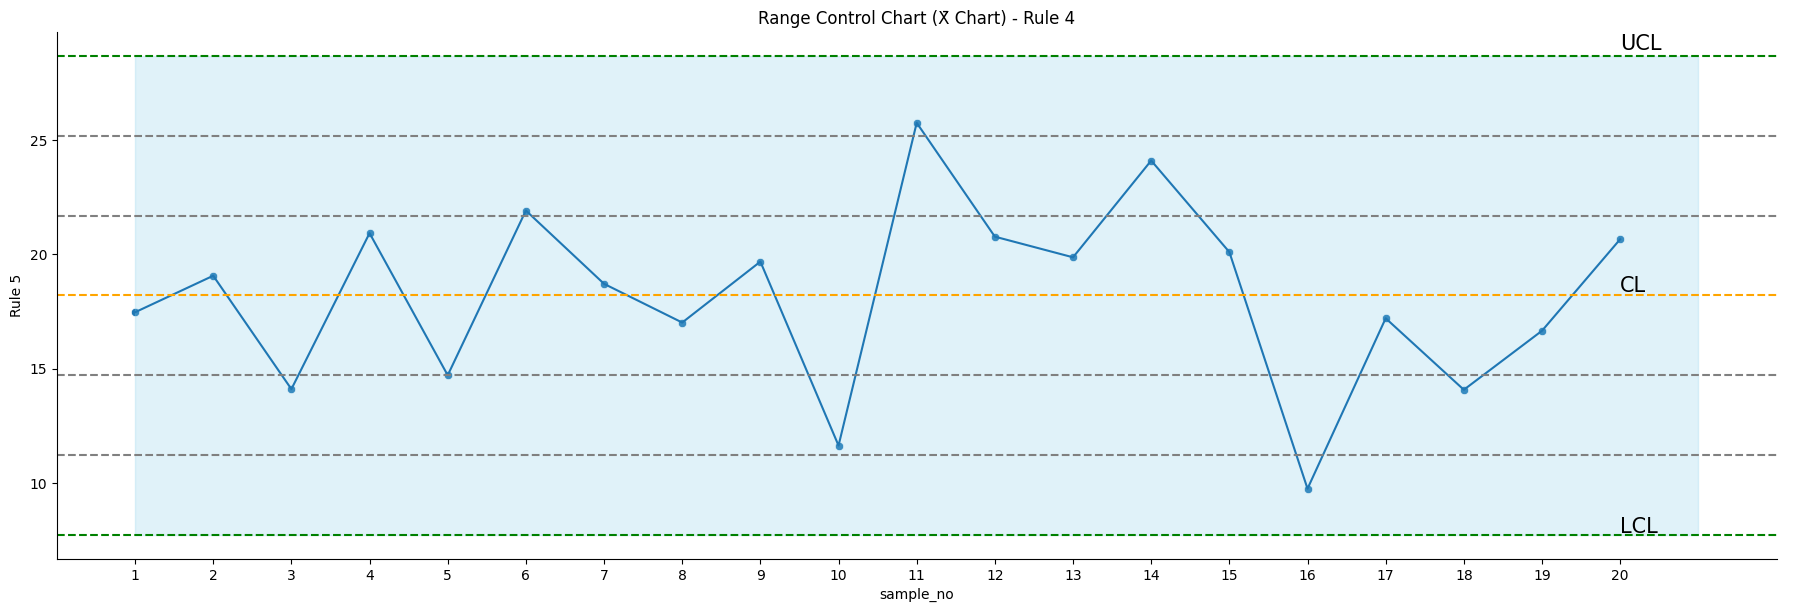

In [27]:
# Generate the Rule 4 control chart for R (range control chart)
control_chart.plot_control_char(data_sheet2, kind='R', rules=['Rule 1', 'Rule 2', 'Rule 3','Rule 4', 'Rule 5'])
plt.title(f'Range Control Chart (X̄ Chart) - Rule 4')
plt.show()

### Results Rule 4(10 points)

Include your insights here (you can add as many cells as you need)

#### Central Tendency Control Chart (X̄ Chart)

The Central Tendency Control Chart (X̄ Chart) for Rule 4 provides insight into the stability of the process mean across the samples, we can see that most of the data points fall within the control limits (UCL and LCL), indicating that the process is in control, however, there are several instances where data points are marked with red stars along the centerline, which indicates a violation of **Rule 4**, which states that **eight or more consecutive points** must lie on one side of the centerline, suggesting a systematic bias or trend in the process that requires further investigation, and this persistent pattern indicates that there might be a subtle but consistent shift affecting the process mean.

The violation of Rule 4 suggests that while the process is within control limits, it is not entirely stable because the trend of points lying consistently on one side of the centerline could be due to external factors that are systematically influencing the process; examples of possible causes could include gradual changes in raw material quality, environmental conditions, or operator behavior, all of which need to be assessed to determine their impact on the process.

#### Range Control Chart (R Chart)

The Range Control Chart (R Chart) for Rule 4 shows the variability within samples because the data points in the R Chart fluctuate above and below the centerline, with none of the points exceeding the control limits (UCL and LCL); this indicates that the variation in the process is under control, however, the variability appears to be somewhat inconsistent, with several peaks and valleys across the samples, suggesting that while the process is not out of control, it does exhibit significant variation.

The inconsistent fluctuations in range could be attributed to inconsistencies in the process, such as variations in equipment performance, raw materials, or human factors, although the range remains within acceptable control limits, it would be prudent to investigate the underlying causes of these variations to ensure a more stable process, this investigation could involve evaluating equipment calibration, examining variations in material properties, or ensuring that standard operating procedures are consistently followed by operators.

#### Potential Issues and Recommendations

The analysis of the control charts for Sheet 2 reveals several potential issues that require further attention to maintain or improve process control; the **Central Tendency Control Chart** highlights a violation of Rule 4, indicating a systematic shift in the process mean that could lead to instability if not addressed, and the **Range Control Chart** shows that while the variability is within limits, it fluctuates significantly, suggesting potential inconsistencies in the process.

A thorough investigation should be conducted to determine the causes of the systematic bias indicated by the Rule 4 violations, this may involve reviewing recent changes in material suppliers, environmental factors, or operator behavior that could be influencing the process mean, also regular equipment maintenance and calibration are crucial to minimize inconsistencies in the process, we believe that by ensuring that machines are operating correctly and that any worn parts are replaced will help reduce variability.

We also recommended to provide additional training to operators to ensure adherence to standard operating procedures (SOPs) because human factors can often contribute to variability, and training can help minimize errors and maintain process consistency and by addressing these recommendations, the process can be stabilized further, reducing variability and preventing systematic shifts that could lead to quality issues. 

We think that implementing those recomendations will help maintain control over the process, ensuring consistent quality and performance over time.